In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
197,ham,is your hamster dead? Hey so tmr i meet you at...,NaN,NaN,NaN
4147,spam,Please call Amanda with regard to renewing or ...,NaN,NaN,NaN
1351,ham,Yo theres no class tmrw right?,NaN,NaN,NaN
1108,ham,No you'll just get a headache trying to figure...,NaN,NaN,NaN
4817,ham,How's ur paper?,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [13]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
785,ham,"She was supposed to be but couldn't make it, s..."
688,ham,Thanks love. But am i doing torch or bold.
2055,ham,"Sir, I am waiting for your mail."
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...
4576,spam,Had your contract mobile 11 Mnths? Latest Moto...


In [21]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
3850,ham,We have all rounder:)so not required:)
1099,ham,Been up to ne thing interesting. Did you have ...
883,ham,Dude we should go sup again
1978,ham,No I'm in the same boat. Still here at my moms...
4788,ham,We're on the opposite side from where we dropp...


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
# check for duplicate values
df.duplicateddf.duplicated().sum()().sum()

403

In [33]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

0

In [39]:
df.shape

(5169, 2)

2.EDA

In [41]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

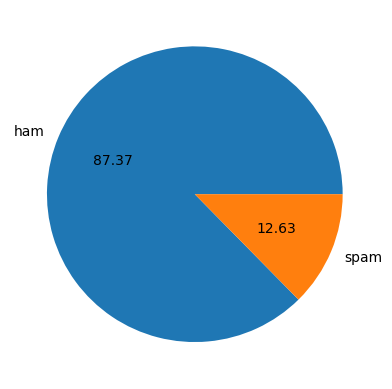

In [45]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [47]:
# Data is imbalanced

In [49]:
import nltk

In [51]:
!pip install nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/aanya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df['num_characters'] = df['text'].apply(len)

In [57]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [61]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [63]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [73]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

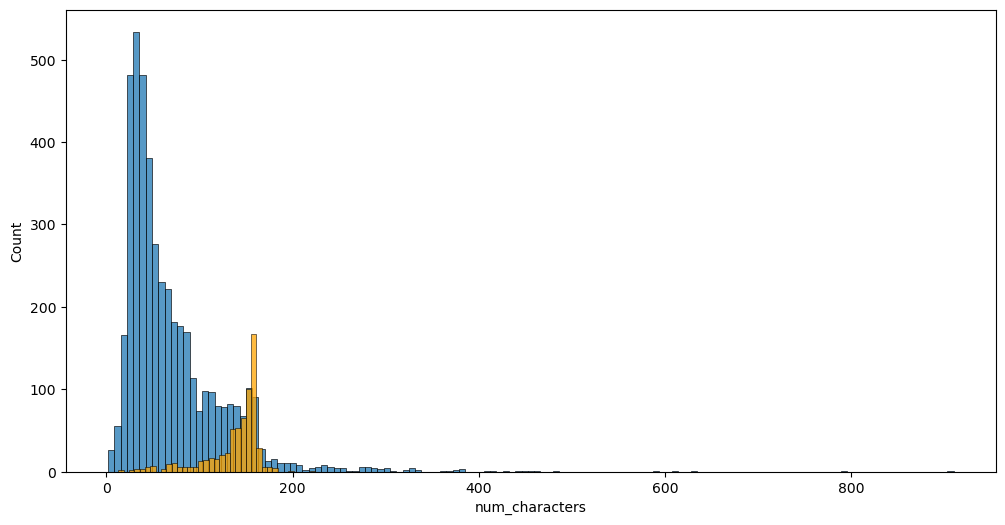

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='orange')

<Axes: xlabel='num_words', ylabel='Count'>

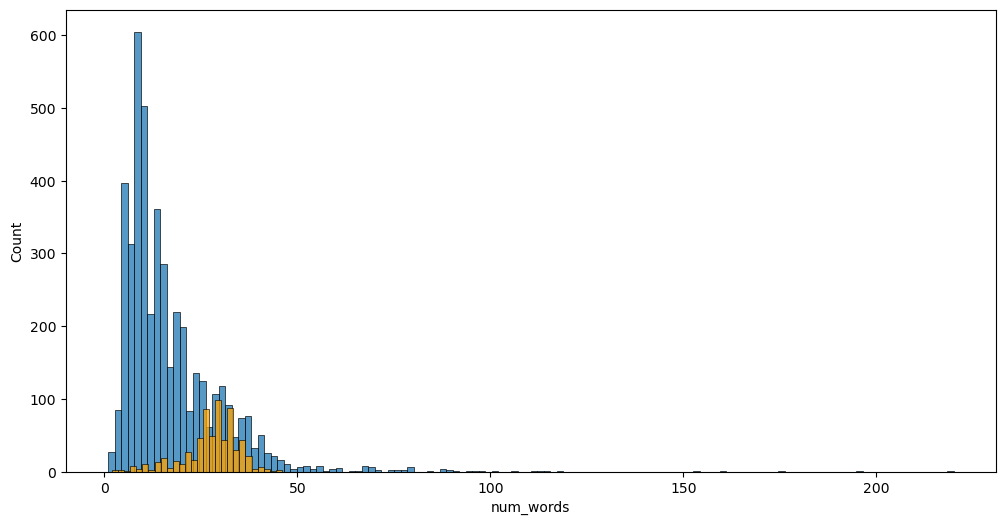

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='orange')

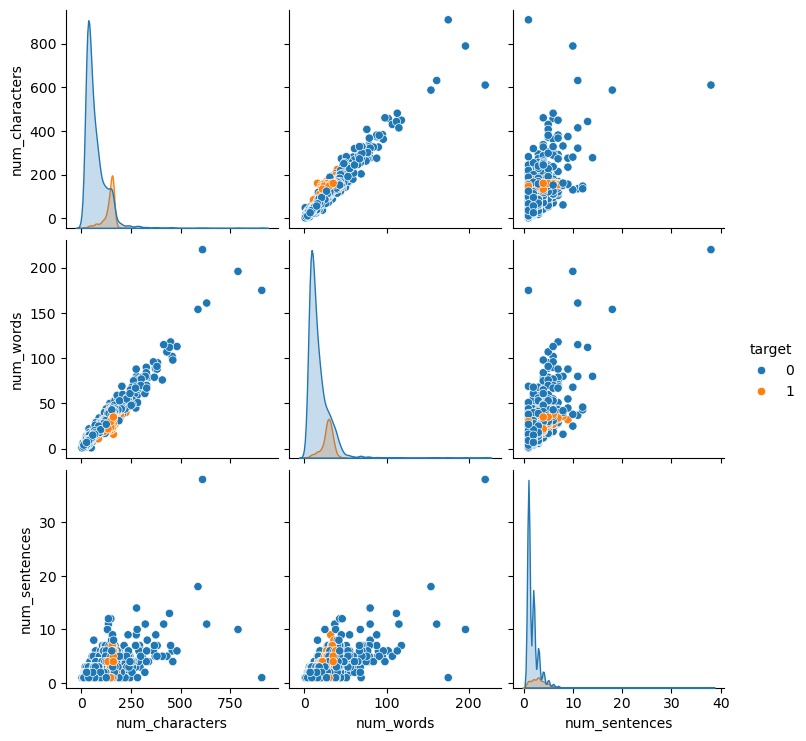

In [79]:
sns.pairplot(df,hue='target')

<Axes: >

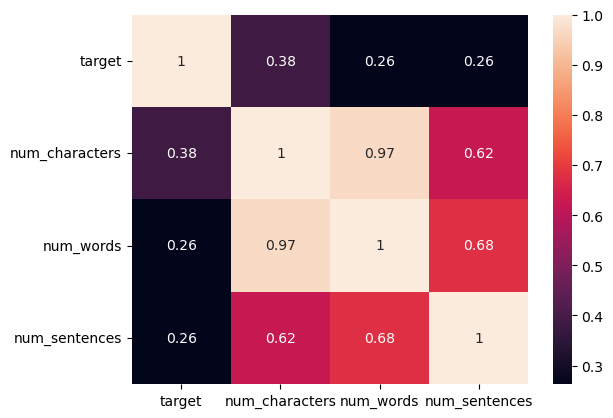

In [83]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True)


3. Data Preprocessing

Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [85]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [89]:
import nltk
from nltk.corpus import stopwords
import string

# Download the stopwords resource if you haven't done it already
nltk.download('stopwords')

def transform_text(text):
    y = []
    for i in text.split():
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return ' '.join(y)

# Test the function
print(transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."))


I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today.


[nltk_data] Downloading package stopwords to /Users/aanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [95]:
df['transformed_text'] = df['text'].apply(transform_text)

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I think goes usf, lives around though"


In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [101]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

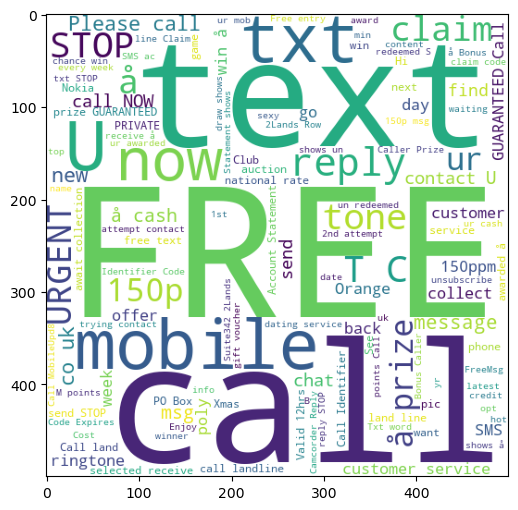

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [105]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

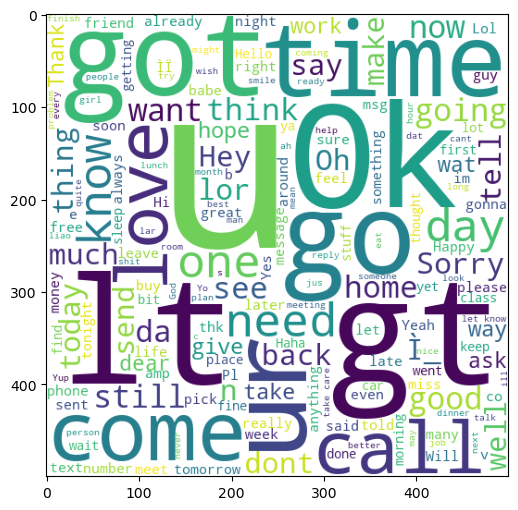

In [107]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [109]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I think goes usf, lives around though"


In [111]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [113]:
len(spam_corpus)

11753

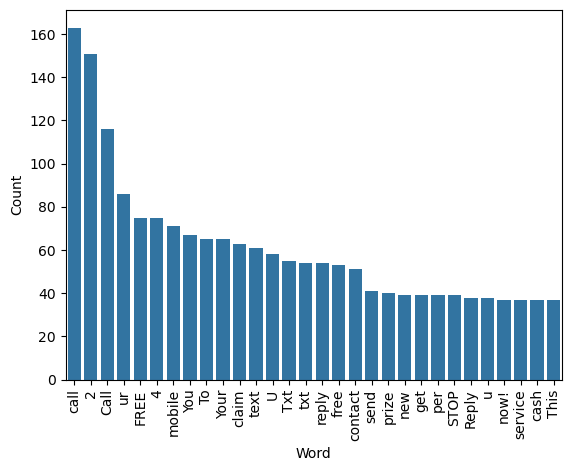

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming spam_corpus is already defined

# Get the 30 most common words
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(x=df_common_words['Word'], y=df_common_words['Count'])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [119]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [121]:
len(ham_corpus)

43032

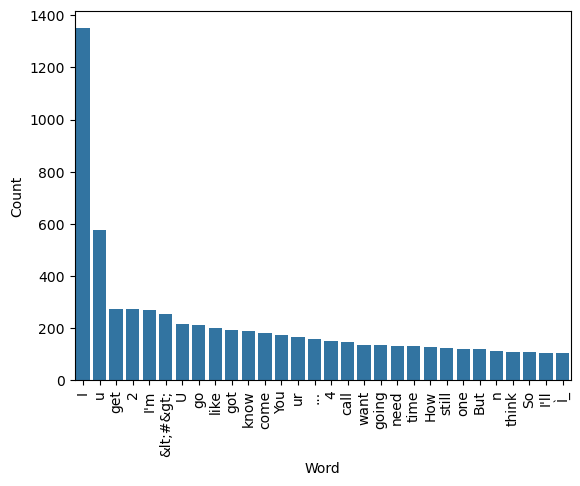

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming spam_corpus is already defined

# Get the 30 most common words
common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(x=df_common_words['Word'], y=df_common_words['Count'])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [127]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I think goes usf, lives around though"


4. Model Building

In [129]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [131]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [133]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [135]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [137]:
X.shape

(5169, 3000)

In [139]:
y = df['target'].values

In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [149]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8936170212765957
[[804  92]
 [ 18 120]]
0.5660377358490566


In [151]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [153]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[894   2]
 [ 14 124]]
0.9841269841269841


In [155]:
# tfidf --> MNB

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [159]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [161]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [163]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [165]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9836065573770492)

In [167]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9787234042553191
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8811881188118812
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8914728682170543
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9576271186440678


In [168]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [171]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.978723,1.000000
0,SVC,0.980658,0.983607
8,ETC,0.980658,0.983607
5,RF,0.970986,0.982143
6,AdaBoost,0.969052,0.973214
4,LR,0.958414,0.961165
10,xgb,0.970986,0.957627
9,GBDT,0.946809,0.927835
7,BgC,0.964217,0.891473


In [173]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [175]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.978723
2,SVC,Accuracy,0.980658
3,ETC,Accuracy,0.980658
4,RF,Accuracy,0.970986
5,AdaBoost,Accuracy,0.969052
6,LR,Accuracy,0.958414
7,xgb,Accuracy,0.970986
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.964217


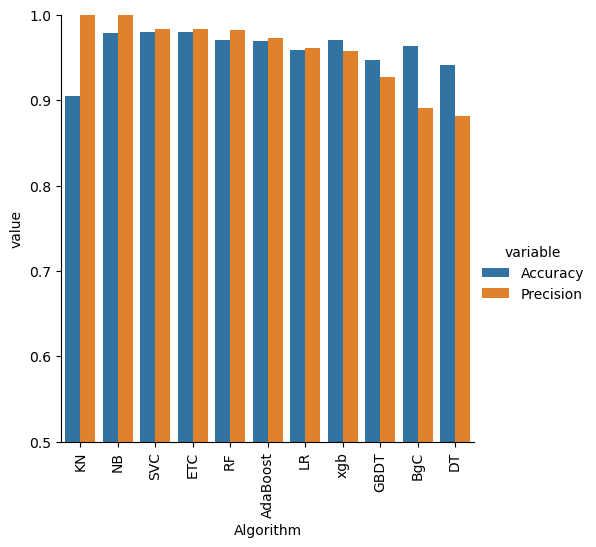

In [177]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [179]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [181]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [183]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [185]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [187]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [189]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [191]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
2,SVC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
3,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,RF,0.970986,0.982143,0.970986,0.982143,0.970986,0.982143,0.970986,0.982143
5,AdaBoost,0.969052,0.973214,0.969052,0.973214,0.969052,0.973214,0.969052,0.973214
6,LR,0.958414,0.961165,0.958414,0.961165,0.958414,0.961165,0.958414,0.961165
7,xgb,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627
8,GBDT,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835
9,BgC,0.964217,0.891473,0.964217,0.891473,0.964217,0.891473,0.964217,0.891473


In [193]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [195]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [197]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [198]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [199]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [200]:
from sklearn.ensemble import StackingClassifier

In [205]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [211]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9893617021276596
Precision 0.9847328244274809


In [212]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Example spam data (replace with your actual data)
spam_csv = {
    'text': ['Buy cheap meds now!', 'Hey, are we meeting tomorrow?', 'Limited offer on loans!', 'Let’s catch up soon!'],
    'label': ['spam', 'ham', 'spam', 'ham']
}

# Convert to DataFrame
import pandas as pd
spam_df = pd.DataFrame(spam_csv)

# Prepare feature and target data
X = spam_df['text']
y = spam_df['label']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Now you can use the model to make predictions
vector_input = vectorizer.transform(['Your input text here'])
result = model.predict(vector_input)[0]

print("Prediction:", result)


Prediction: spam


In [208]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))